In [135]:
%run ./CAD_Common_Functions.ipynb
%run ./CAD_Data_Prep.ipynb
%run ./CAD_Algorithm.ipynb
%run ./CAD_Results.ipynb

In [136]:
generate_data = False
execute_algorithm = True
results_analysis = True
customer_name = 'TMO'

In [137]:
source_path = customer_name + '/raw'
CAD_input_path = customer_name + '/input'
CAD_results_path = customer_name + '/results'

dates = ['2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21']
#dates = ['2022-08-16']

checkTiming()

Time spent since last check point: 00:00:00
Time spent since start of script: 00:00:00


### Use TMO Data to generate Hitrate and Capacity input data

In [138]:
if generate_data:
    for date in dates:
        create_TMO_data_sample(source_path, CAD_input_path, date)


    checkTiming()


### Run the CAD Algorithm with the generated data

In [139]:
selection = 'full' # full or partial - decision from the customer
primary_nodes = [] # List of nodes to exclude from the total
unwanted_links = [] #List of links not to create
mandatory_links = [] # List of links that must be created

set_node_selection(selection, primary_nodes, unwanted_links, mandatory_links)

In [140]:
if execute_algorithm:
    for date in dates:
        df = run_algorithm(CAD_input_path, date)

        results_file_path = CAD_results_path + '/Suggested_links_' + date + '.csv'
        write_file(df, results_file_path)
        print('Algorithm executed for ' + date + '. Results written to ' + results_file_path)

    print('\n')
    checkTiming()        

FileNotFoundError: [Errno 2] No such file or directory: 'TestData/input/cucp_cellcu_merge.csv'

### Analysis of the results

In [ ]:
df_results = load_results(CAD_results_path, dates)
df_results

,primary_gnb,secondary_gnb,gNbs,usability,hitrate,selected,unwanted,mandatory,primary_node_name,secondary_node_name,datetime
0,1609808,1609809,"(1609808, 1609809)",61.082093,0.343186,True,False,False,M9AT1108A2,M9AT1108A3,2022-08-16
1,1612015,1612018,"(1612015, 1612018)",57.037885,0.547739,True,False,False,M9AT1325A2,M9AT1325A3,2022-08-16
2,1597967,1612018,"(1597967, 1612018)",0.196747,0.009292,True,False,False,M9AT2356B3,M9AT1325A3,2022-08-16
3,1612543,1612544,"(1612543, 1612544)",55.320800,0.357925,True,False,False,M9AT4322A2,M9AT4322A3,2022-08-16
4,1594379,1612544,"(1594379, 1612544)",0.762644,0.019468,True,False,False,M9AT0460B3,M9AT4322A3,2022-08-16
...,...,...,...,...,...,...,...,...,...,...,...
113520,1598267,1612518,"(1598267, 1612518)",0.403132,0.088206,True,False,False,M9AT3634A2,M9AT3635A2,2022-08-21
113521,1608071,1612518,"(1608071, 1612518)",0.288444,0.063112,True,False,False,M9AT0641B2,M9AT3635A2,2022-08-21
113522,1605138,1609375,"(1605138, 1609375)",0.811048,0.152986,True,False,False,M9AT0265C2,M9AT3241A2,2022-08-21
113523,1607734,1608065,"(1607734, 1608065)",0.626490,0.221286,True,False,False,M9AT5299A2,M9AT1260A2,2022-08-21


### Links selected versus links rejected

<Axes: xlabel='selected'>

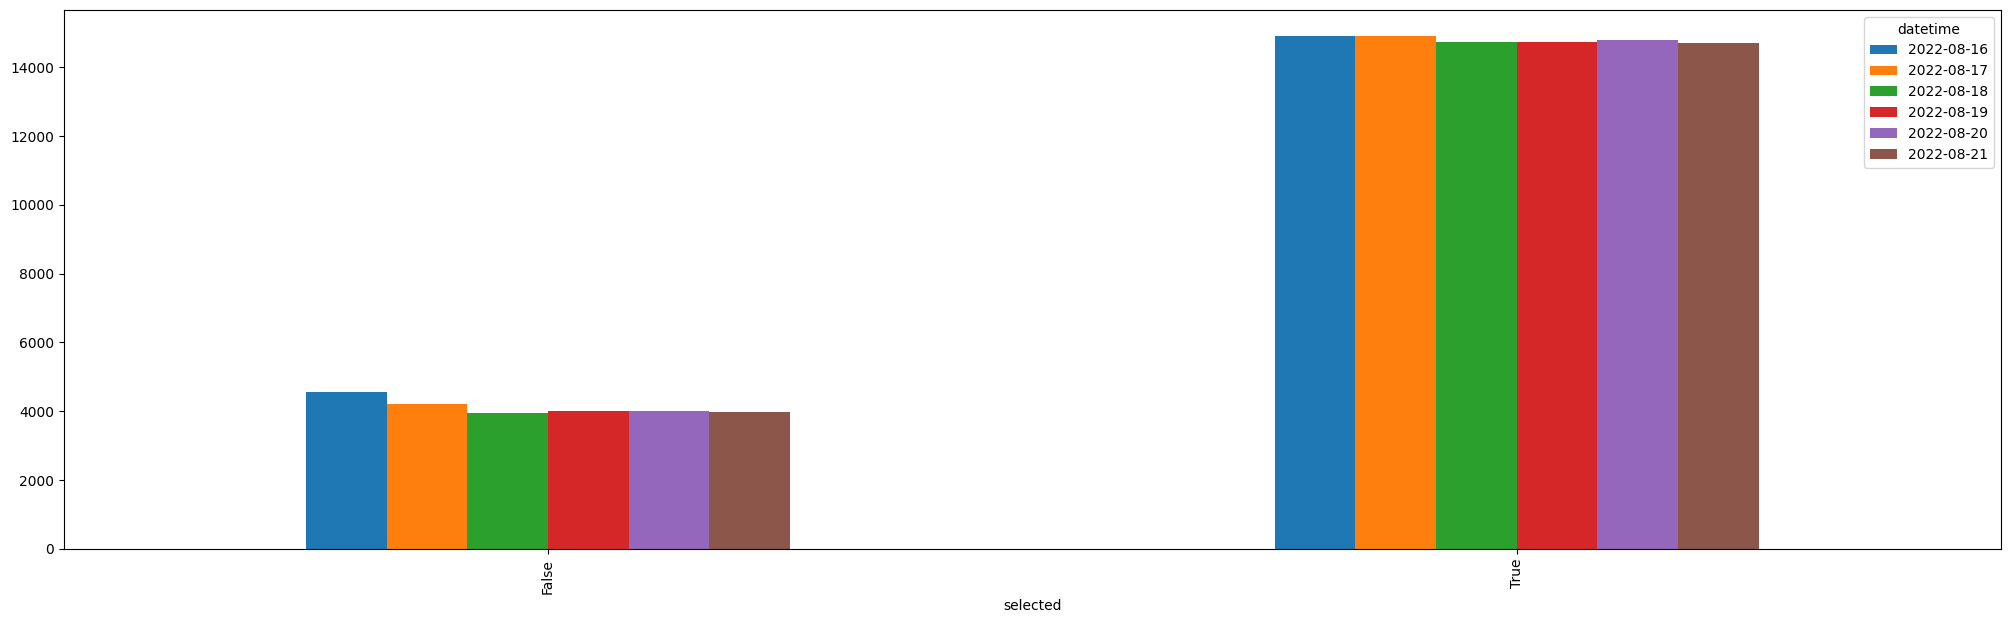

In [ ]:
df = links_per_day(df_results)
df.plot(kind="bar", figsize=(25,7))

### All links distribution across nodes

<Axes: xlabel='selected'>

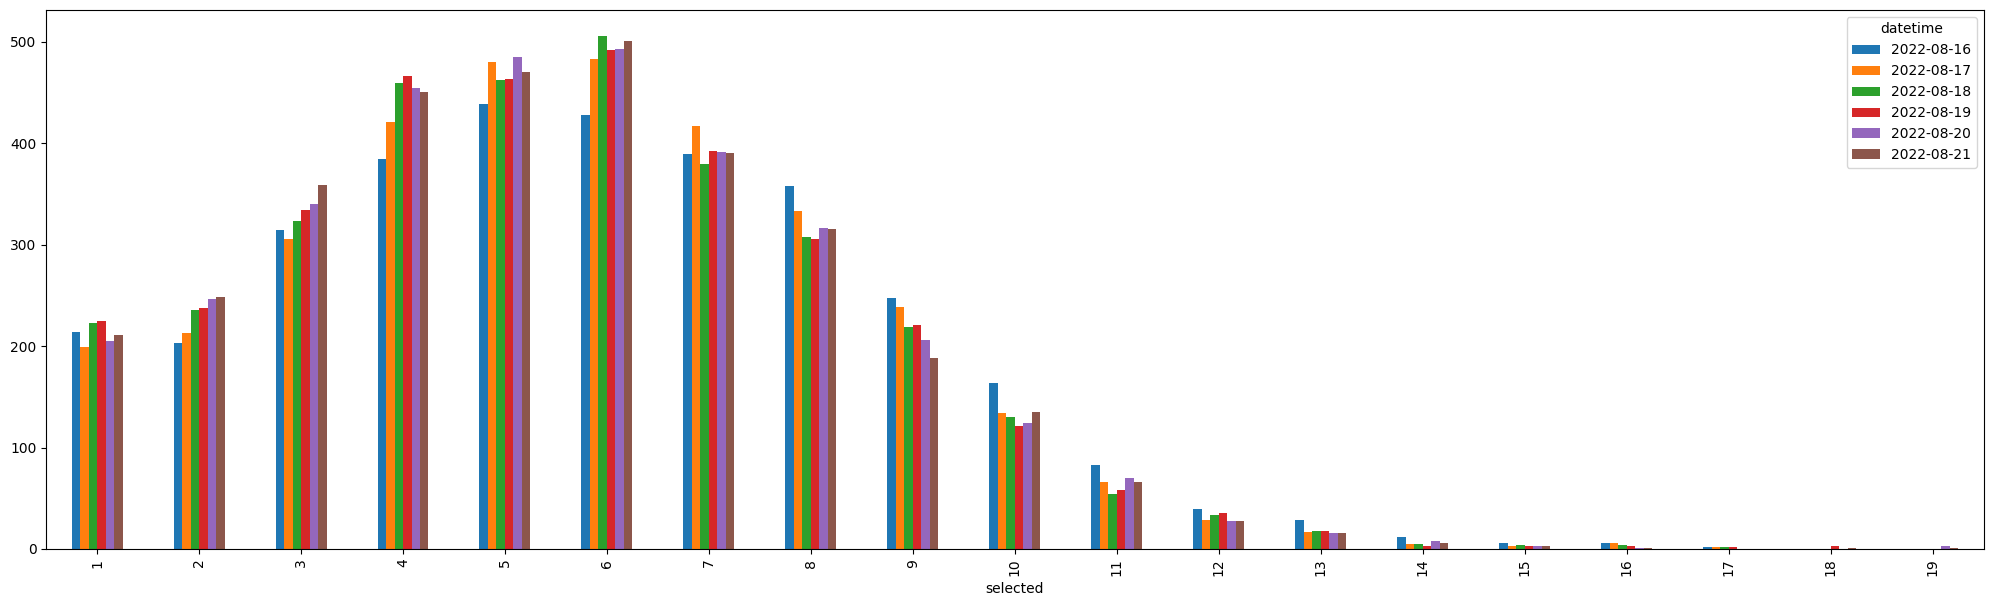

In [ ]:
df = links_distribution(df_results)
df.plot(kind="bar", figsize=(25,7))

### Suggested links distribution across nodes

<Axes: xlabel='selected'>

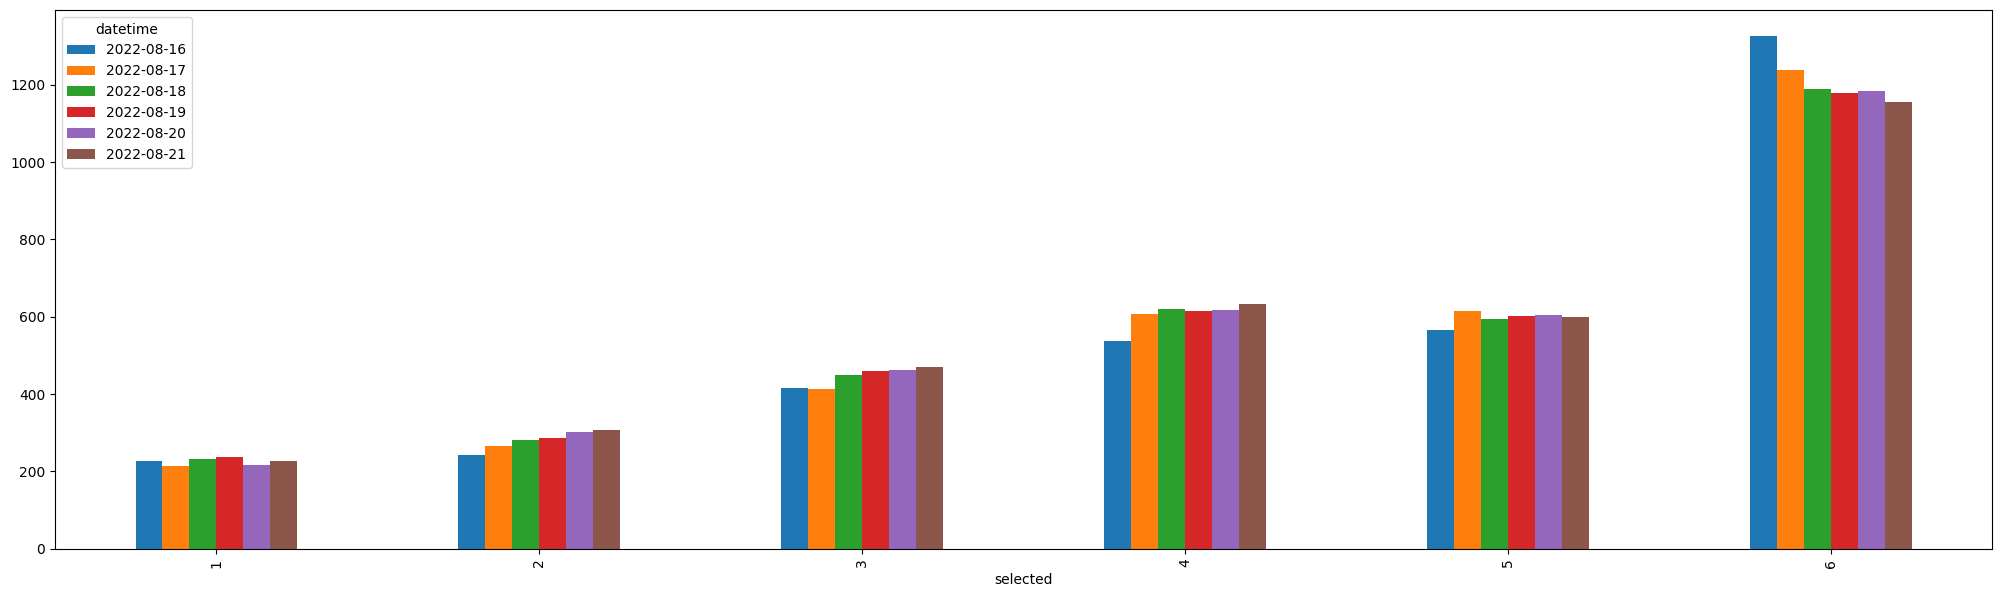

In [ ]:
df = links_distribution_nodes(df_results)
df.plot(kind="bar", figsize=(25,7))

### % Of Hitrate Captured by Suggested Links

For the hitrate between 2 nodes, what percentage of the possible coverage do the suggested links capture

<Axes: xlabel='hitrate'>

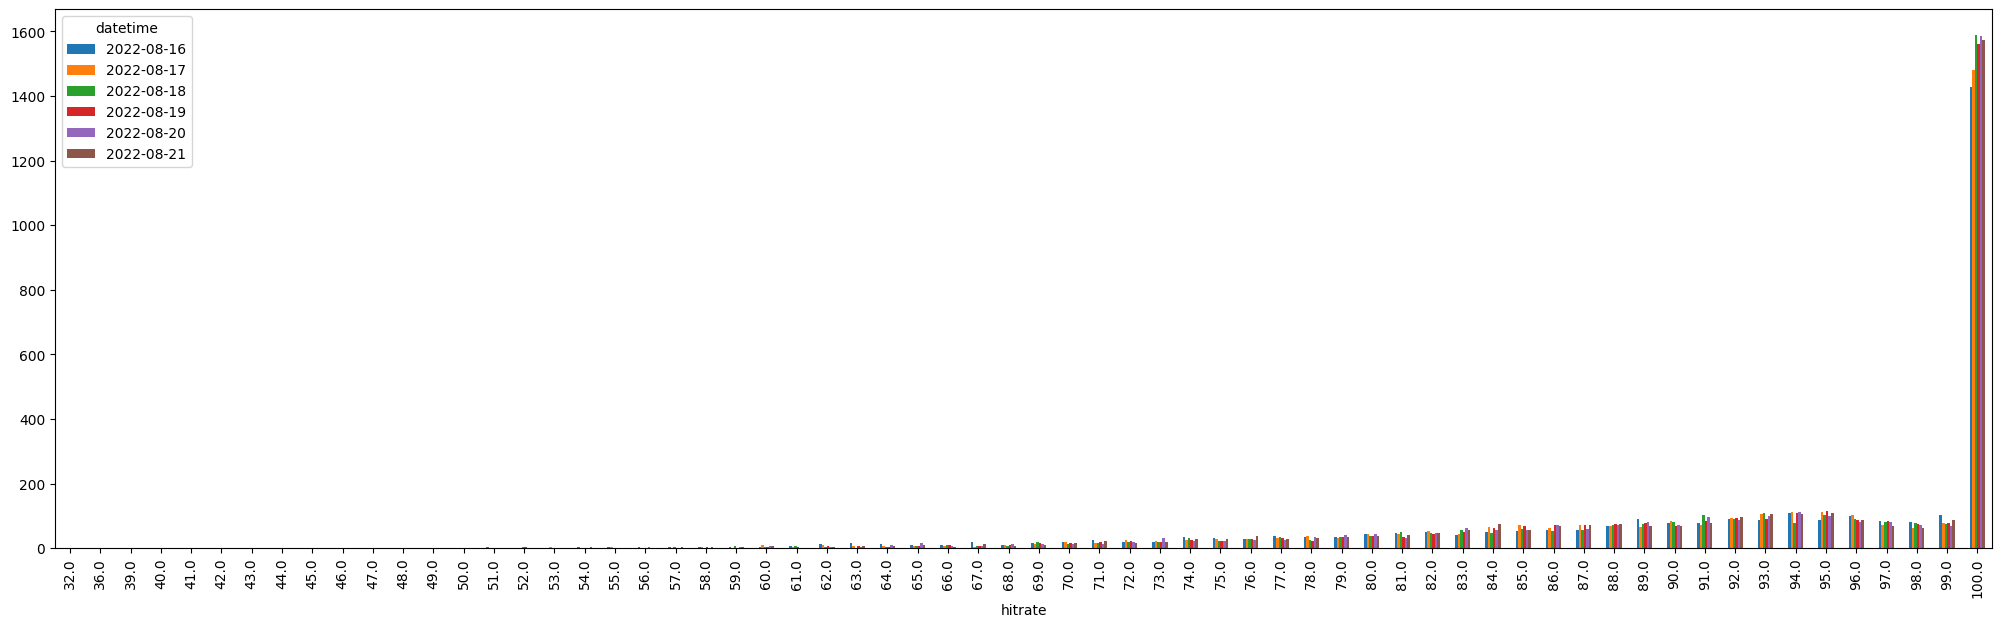

In [ ]:
df = hitrate_coverage(df_results)
df.plot(kind="bar", figsize=(25,7))

### Rate of change 

measure,common,new,removed,total,common_percent,new_percent,removed_percent
variable,,,,,,,
2022-08-17,13047,1873,1857,14920,87.446381,12.553619,12.446381
2022-08-18,13863,864,1057,14727,94.133225,5.866775,7.177293
2022-08-19,13848,883,879,14731,94.005838,5.994162,5.967008
2022-08-20,13693,1111,1038,14804,92.495272,7.504728,7.011618
2022-08-21,13795,909,1009,14704,93.818009,6.181991,6.862078


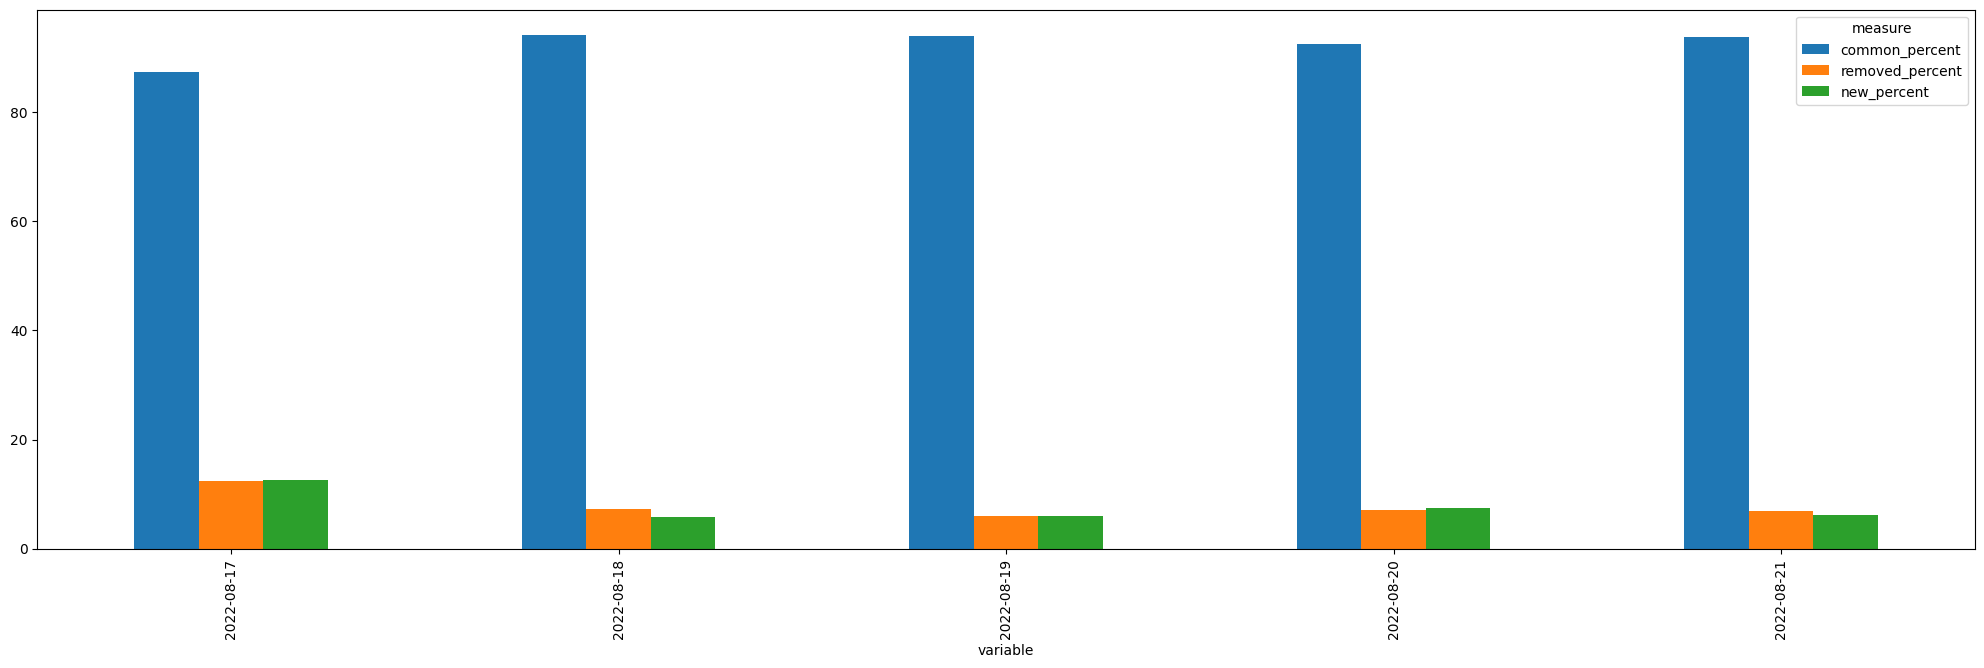

In [ ]:
df = roc_over_days(df_results, dates[1:])
df[['common_percent', 'removed_percent', 'new_percent']].plot(kind="bar", figsize=(25,7))
df

### Distribution of links removed each day

<Axes: xlabel='selected'>

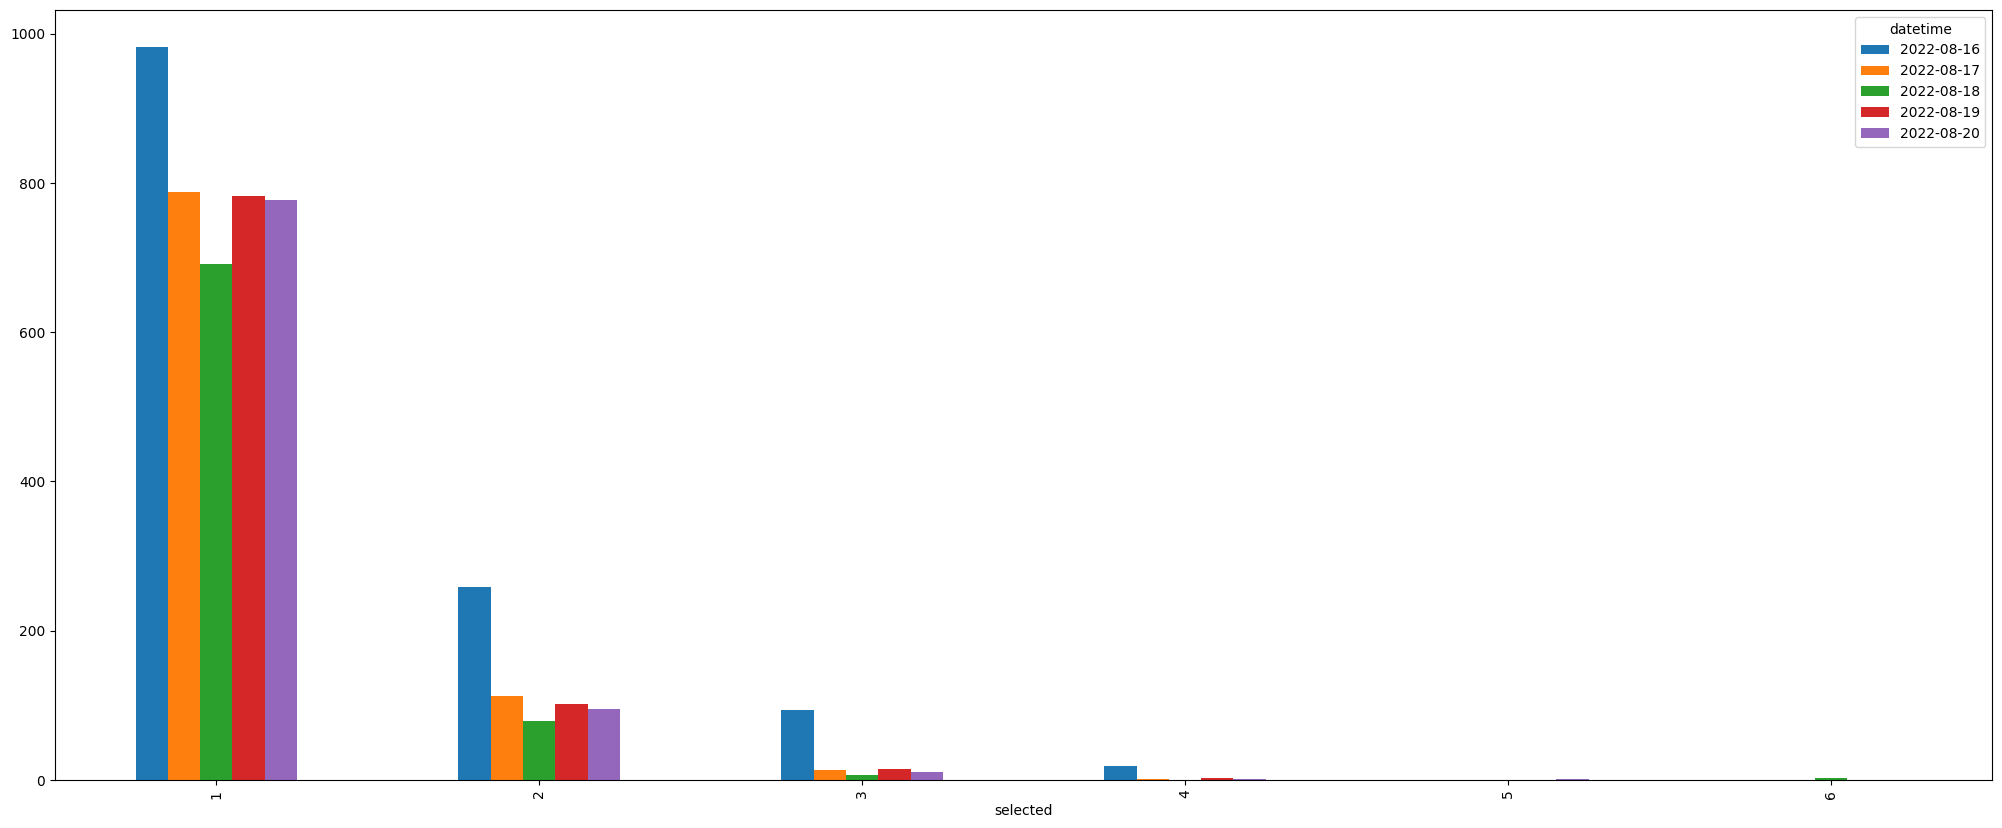

In [ ]:
df = removed_links(df_results)
df.plot(kind="bar", figsize=(25,10))

### Drill down on a node changes

In [ ]:
df = rank_links(df_results)

nodeid = 1600270
nodename = 'M9AT0363E2'

df_node_specifc = df.loc[ df['primary_gnb'] == nodeid ]

df_node_specifc

,primary_gnb,secondary_gnb,gNbs,usability,hitrate,selected,unwanted,mandatory,primary_node_name,secondary_node_name,datetime,secondary_rank,primary_rank
13848,1600270,1600271,"(1600270, 1600271)",44.945267,0.291247,True,False,False,M9AT0363E2,M9AT0363E3,2022-08-21,1,1
13849,1600270,1595976,"(1600270, 1595976)",0.421501,0.159344,True,False,False,M9AT0363E2,M9AT4387A2,2022-08-21,4,2
13850,1600270,1605590,"(1600270, 1605590)",0.276656,0.093619,False,False,False,M9AT0363E2,M9AT0373G2,2022-08-21,7,3
13851,1600270,1598963,"(1600270, 1598963)",0.128851,0.050869,False,False,False,M9AT0363E2,M9AT4239A2,2022-08-21,10,4
32631,1600270,1600271,"(1600270, 1600271)",45.347068,0.338133,True,False,False,M9AT0363E2,M9AT0363E3,2022-08-20,1,1
32632,1600270,1595976,"(1600270, 1595976)",0.508764,0.190215,True,False,False,M9AT0363E2,M9AT4387A2,2022-08-20,4,2
32633,1600270,1605590,"(1600270, 1605590)",0.274732,0.092656,True,False,False,M9AT0363E2,M9AT0373G2,2022-08-20,6,3
32634,1600270,1598963,"(1600270, 1598963)",0.107664,0.043083,False,False,False,M9AT0363E2,M9AT4239A2,2022-08-20,9,4
51328,1600270,1600271,"(1600270, 1600271)",47.769191,0.303669,True,False,False,M9AT0363E2,M9AT0363E3,2022-08-19,1,1
51329,1600270,1595976,"(1600270, 1595976)",0.348445,0.136218,True,False,False,M9AT0363E2,M9AT4387A2,2022-08-19,4,2


In [ ]:
df_16_data = df_node_specifc[ df_node_specifc['datetime'] == '2022-08-16' ]
gv.d3( render_network_graph(df_16_data) )

In [ ]:
df_21_data = df_node_specifc[ df_node_specifc['datetime'] == '2022-08-21' ]
gv.d3( render_network_graph(df_21_data) )

In [ ]:
checkTiming()

Time spent since last check point: 00:00:05
Time spent since start of script: 00:00:54
